# <center> Diamond Price Predictions
<center> Samantha Howard

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Howar271/cmse402/blob/main/diamond.ipynb)

$\;\;\;\;\;\;$This data set contains almost 54,000 diamonds and 10 different features. This notebook is brken up into multiple subsections to walk you though the analysis of this data. First, the next section explains the definition of each feature and how they are obtained for each diamond. These features were aready provided in the data set but was deemed important to understand what these measurments mean in the context of this assassiment. Then by important the data, looking at distrubutions of the data, finding corralations and unltimently creating multiple models to then choose the most accurateone so then that data can be accuratly predicted for the price of each diamond in the data set and plot them agaisnt each other.

$\;\;\;\;\;\;$Additinaly the choice behind this project was to reevaluate a previously used data set from one of my first semesters at Michigan State University in the CMSE department, as a means to demonstrate how my skills have developed over the course of my education.



### Diamond Features Explaination

<b>Price:</b> price in US dollars

<b>Carat:</b> weight of the diamond  <br>
The weight in carats of a diamond depends on the equation: 

<center> $Carats = Length * Width * Depth * Coefficient$ <br></center>
The length, width, and depth values of the diamond are the X, Y, and Z measurments given. Then, the coefficent used in the above equation is dependent on the shape of the diamond. If the diamond's shape is round then the coefficent is <b>0.006</b>.<br> Otherwise, it is according to its Length to Width ratio: <br><br>
$\;\;\;\;\;\;$ Ratio of 1.25: Coefficient = 0.0080 <br>
$\;\;\;\;\;\;$ Ratio of 1.50: Coefficient = 0.0090 <br>
$\;\;\;\;\;\;$ Ratio of 2.00: Coefficient = 0.0100 <br>
$\;\;\;\;\;\;$ Ratio of 2.50: Coefficient = 0.0105 <br>

<b>Cut:</b> quality of the cut <br>
The Quality of the cut are in the catagoragorical values of: <br>Fair - Good - Very Good - Premium - Ideal

<b>Color:</b> color grade of the diamond <br>
The Quality of the color are in the catagoragorical values of: <br>
D (best) - E - F - G - H - I - J (worst)  

<b>Clarity:</b> measurement of how clear the diamond is <br>
The Quality of the clarity are in the catagoragorical values of: <br>
IF (best) - VVS1 - VVS2 - VS1 - VS2 - SI1 - SI2 - I1 (worst)

<b>X:</b> length in mm <br>
The length of the diamond is the numeric values between:<br>
(0 - 10.74)

<b>Y:</b> width in mm<br>
The width of the diamond is the numeric values between:<br>
(0 - 58.9)

<b>Z:</b> depth in mm <br>
The depth of the diamond is the numeric values between:<br>
(0 - 31.8)

<b>Depth:</b> total depth percentage <br>
  <center>$\frac{z}{mean(x, y)} = \frac{2z}{(x + y)}$</center><br>
The depth percentage of the diamond is the numeric values between:  
(43 - 79)

<b>Table:</b> width of top of diamond relative to widest point<br>
The table of the diamond is the numeric values between: <br>
(43 - 95)

### Importing Data
Importing the packages used in this notebook.

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

## Take a Quick Look at the Data

In [3]:
data = pd.read_csv("diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
data = data.drop(["Unnamed: 0"], axis=1)
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
# Dropping dimentionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(53920, 10)

In [7]:
# Dropping the outliers. 
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(53907, 10)

In [8]:
data.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


### Visulizations
The visulizations included in this notebook in order of apperance:
* voilin plots of depth, table and Carat
* boxplot of cut
* hist of distubution of categorical features: price (not a catogroical feature), color, clarity
* hist dimensions: x,y,z
* 2d histogram: x y z
* heatmap of corr
* scatter of actual price vs predicted

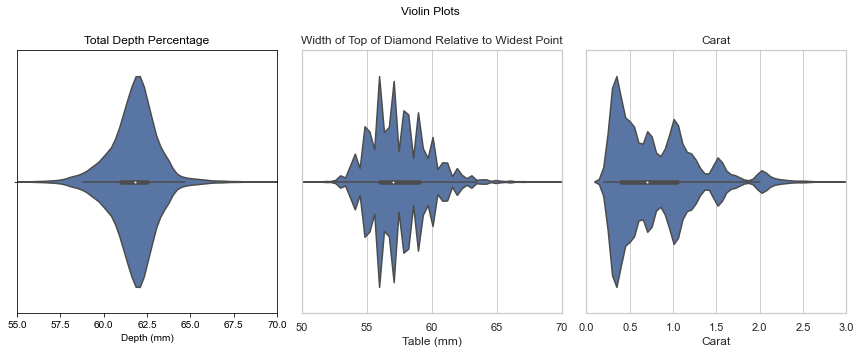

In [9]:
plt.figure(figsize=(12,5))
plt.suptitle("Violin Plots")

plt.subplot(1,3,1)
plt.title("Total Depth Percentage")
sns.set_theme(style="whitegrid")
sns.violinplot(x=data["depth"])
plt.xlabel("Depth (mm)")
plt.xlim([55,70])

plt.subplot(1,3,2)
plt.title("Width of Top of Diamond Relative to Widest Point")
sns.set_theme(style="whitegrid")
sns.violinplot(x=data["table"])
plt.xlabel("Table (mm)")
plt.xlim([50,70])

plt.subplot(1,3,3)
plt.title("Carat")
sns.set_theme(style="whitegrid")
sns.violinplot(x=data["carat"])
plt.xlabel("Carat")
plt.xlim([0,3])
plt.tight_layout()

Text(0.5, 1.0, 'Boxplot of Cuts')

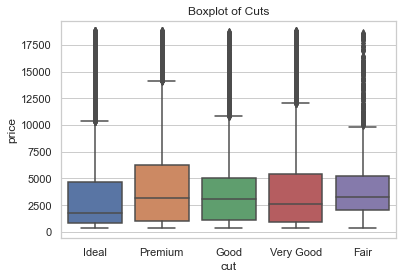

In [28]:
plt.figure()
sns.boxplot(y=data['price'],x=data['cut'])
plt.title("Boxplot of Cuts")
#plt.ylim([0,11000])
#plt.ylim([0,10000])

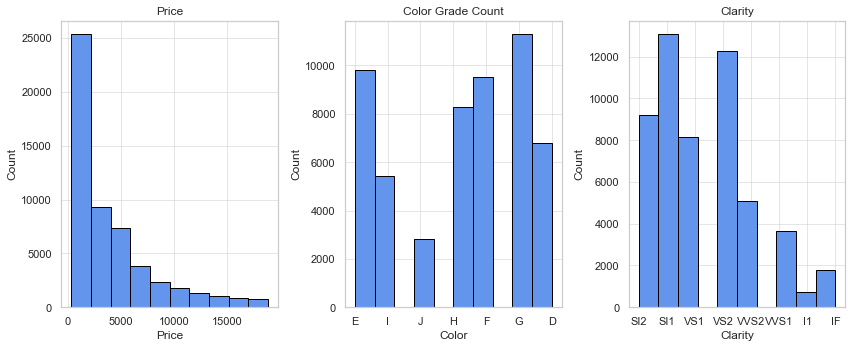

In [11]:
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.title("Price")
plt.ylabel("Count")
plt.xlabel("Price")
plt.grid(alpha=0.5)
plt.hist(data["price"], color = "cornflowerblue", edgecolor='black')

plt.subplot(1,3,2)
plt.title("Color Grade Count")
plt.ylabel("Count")
plt.xlabel("Color")
plt.grid(alpha=0.5)
plt.hist(data["color"], color = "cornflowerblue", edgecolor='black')

plt.subplot(1,3,3)
plt.title("Clarity")
plt.ylabel("Count")
plt.xlabel("Clarity")
plt.grid(alpha=0.5)
plt.hist(data["clarity"], color=["cornflowerblue"], edgecolor='black')
plt.tight_layout()

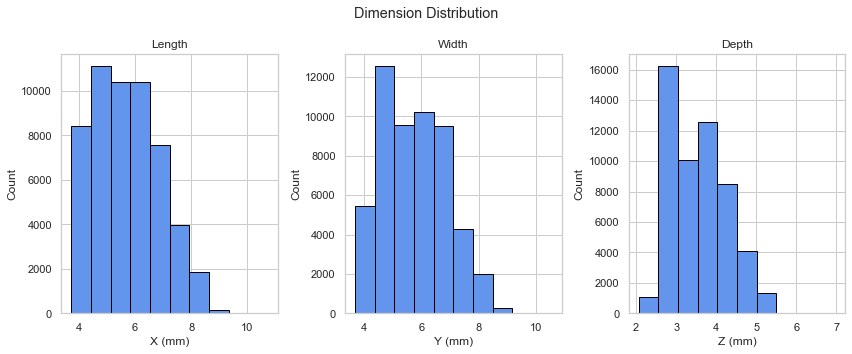

In [12]:
plt.figure(figsize=(12,5))
plt.suptitle("Dimension Distribution")
plt.subplot(1,3,1)
plt.title("Length")
plt.hist(data["x"], color = "cornflowerblue", edgecolor='black')
plt.ylabel("Count")
plt.xlabel("X (mm)")

plt.subplot(1,3,2)
plt.title("Width")
plt.hist(data["y"], color = "cornflowerblue", edgecolor='black')
plt.ylabel("Count")
plt.xlabel("Y (mm)")

plt.subplot(1,3,3)
plt.title("Depth")
plt.hist(data["z"], color = "cornflowerblue", edgecolor='black')
plt.ylabel("Count")
plt.xlabel("Z (mm)")
plt.tight_layout()

In [15]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [37]:
# Make copy to avoid changing original data 
label_data = data.copy()

# Apply label encoder to each column with categorical data
# Aka cut, color, clarity become numaric
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
#label_data.head()

<AxesSubplot:>

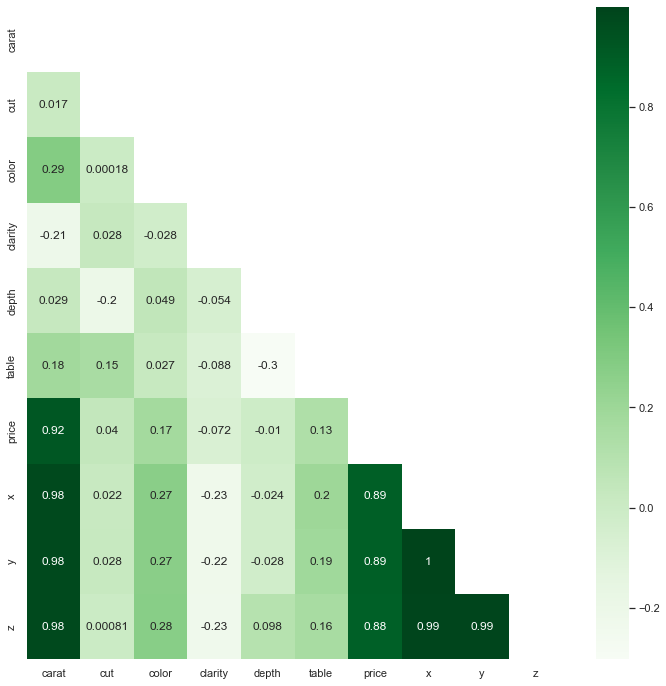

In [34]:
# Correlation Catrix
cmap = sns.color_palette("vlag", as_cmap=True)
corrmat= label_data.corr()
matrix = np.triu(corrmat)
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap="Greens", annot=True, mask=matrix)

### Machine Learning Model

In [18]:
# Assigning the featurs as X and trarget as y
X= label_data.drop(["price"], axis = 1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [19]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [20]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1348.811824 
DecisionTree: -753.178226 
RandomForest: -547.904879 
KNeighbors: -823.649442 
XGBRegressor: -545.458108 


### Summary

In [21]:
pred = pipeline_xgb.predict(X_test)

In [22]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9810847980166805
Adjusted R^2: 0.9810721569817172
MAE: 278.0934000996743
MSE: 296738.36462685897
RMSE: 544.7369682946614


Text(0, 0.5, 'Predicted Price (USD)')

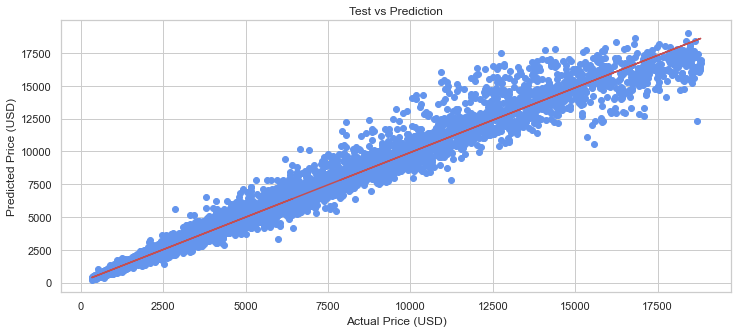

In [36]:
# obtain m (slope) and b (intercept) of linear regression line
m, b = np.polyfit(y_test, pred, 1)

# add linear regression line to scatterplot 
plt.figure(figsize=(12,5))
plt.plot(y_test, m*y_test+b, c="r")

plt.scatter(y_test,pred, c = "cornflowerblue")
plt.title("Test vs Prediction")
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")

 ### Sources
 [Carat](https://www.jewelrynotes.com/how-to-calculate-a-diamonds-weight-in-carats/#:~:text=To%20calculate%20the%20carats%20of,stone%20weighs%20half%20a%20carat.)<br>
 [Data](https://www.kaggle.com/datasets/shivam2503/diamonds)
 formating https://owl.english.purdue.edu/owl/resource/560/01/<br>
 [tab](https://stackoverflow.com/questions/47061626/how-to-get-tab-space-in-markdown-cell-of-jupyter-notebook)

### Link to the Project Poster
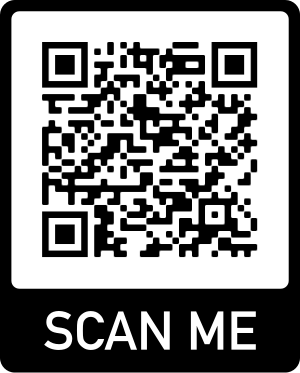